
<div><h1><b><center>Exploratory Data Analysis of Chronic Kidney Disease</b></h1></div>

 ![](https://static.healthcare.siemens.com/siemens_hwem-hwem_ssxa_websites-context-root/wcm/idc/groups/public/@global/documents/image/mda3/nzux/~edisp/ckd_2-04895028/~renditions/ckd_2-04895028~8.jpg)

* Chronic kidney disease (CKD), also known as chronic renal disease. Chronic kidney disease involves 
conditions that damage your kidneys and decrease their ability to keep you healthy. 
* You may develop complications like high blood pressure, anemia (low blood count), weak bones, poor nutritional health and nerve damage.
* Early detection and treatment can often keep chronic kidney disease from getting
worse.

<div><h2><b><center>Data Dictionary</b></h2></div>

1. **age**		-	age
1. **bp**		-	blood pressure
1. **sg**		-	specific gravity
1. **al**		-   albumin
1. **su**		-	sugar
1. **rbc**		-	red blood cells
1. **pc**		-	pus cell
1. **pcc**		-	pus cell clumps
1. **ba**		-	bacteria
1. **bgr**		-	blood glucose random
1. **bu**		-	blood urea
1. **sc**		-	serum creatinine
1. **sod**		-	sodium
1. **pot**		-	potassium
1. **hemo**		-	hemoglobin
1. **pcv**		-	packed cell volume
1. **wc**		-	white blood cell count
1. **rc**		-	red blood cell count
1. **htn**		-	hypertension
1. **dm**		-	diabetes mellitus
1. **cad**		-	coronary artery disease
1. **appet**		-	appetite
1. **pe**		-	pedal edema
1. **ane**		-	anemia
1. **classification**		-	class

<div><h2><b><center>Attribute Information</b></h2></div>

1. Age(numerical) age in years
1. Blood Pressure(numerical) bp in mm/Hg
1. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
1. Albumin(nominal)al - (0,1,2,3,4,5)
1. Sugar(nominal) su - (0,1,2,3,4,5)
1. Red Blood Cells(nominal) rbc - (normal,abnormal)
1. Pus Cell (nominal)pc - (normal,abnormal)
1. Pus Cell clumps(nominal)pcc - (present,notpresent)
1. Bacteria(nominal) ba  - (present,notpresent)
1. Blood Glucose Random(numerical) bgr in mgs/dl
1. Blood Urea(numerical) bu in mgs/dl
1. Serum Creatinine(numerical) sc in mgs/dl
1. Sodium(numerical) sod in mEq/L
1. Potassium(numerical)	pot in mEq/L
1. Hemoglobin(numerical) hemo in gms
1. Packed  Cell Volume(numerical)
1. White Blood Cell Count(numerical) wc in cells/cumm
1. Red Blood Cell Count(numerical) rc in millions/cmm
1. Hypertension(nominal) htn - (yes,no)
1. Diabetes Mellitus(nominal) dm - (yes,no)
1. Coronary Artery Disease(nominal)	cad - (yes,no)
1. Appetite(nominal) ppet	 - (good,poor)
1. Pedal Edema(nominal)	pe - (yes,no)	
1. Anemia(nominal)ane	- (yes,no)
1. Class (nominal) class	 - (ckd,notckd)

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<div><h2><b><center>Loading train and test Dataset</b></h2></div>

In [3]:
train=pd.read_csv('../input/ckdisease/kidney_disease.csv')
# test=pd.read_csv('../input/chronic-kidney-disease/kidney_disease_test.csv')

<div><h2><b><center>Renaming the columns to have meaningful names</b></h2></div>

In [4]:
col={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

train.rename(columns=col, inplace=True)
# test.rename(columns=col, inplace=True)

More info about [data click here](https://github.com/rylativity/CKD_model/blob/master/chronic_kidney_disease.pdf) 

In [5]:
print('We have total {} train sample'.format(train.shape[0]))

We have total 400 train sample


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [7]:
train.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

From the above we can see that our columns have missing values, Lets check missing values percentage

In [8]:
# Percentage of missing values
((train.isnull().sum()/train.shape[0])*100).sort_values(ascending=False)

red_blood_cells            38.00
red_blood_cell_count       32.50
white_blood_cell_count     26.25
potassium                  22.00
sodium                     21.75
packed_cell_volume         17.50
pus_cell                   16.25
hemoglobin                 13.00
sugar                      12.25
specific_gravity           11.75
albumin                    11.50
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
blood_pressure              3.00
age                         2.25
bacteria                    1.00
pus_cell_clumps             1.00
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
anemia                      0.25
appetite                    0.25
pedal_edema                 0.25
classification              0.00
id                          0.00
dtype: float64

In [9]:
#drop id column
train.drop(["id"],axis=1,inplace=True) 

* **id** column seems to be a unique identifier for each row, so we are dropping that it won't help us to find any insights from the data

In [10]:
train['red_blood_cell_count'] = pd.to_numeric(train['red_blood_cell_count'], errors='coerce')
train['white_blood_cell_count'] = pd.to_numeric(train['white_blood_cell_count'], errors='coerce')

Now we have converted columns , **'red_blood_cell_count'** and **'white_blood_cell_count'** as a float

In [11]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,391,NaN,NaN,NaN,51.4834,17.1697,2,42,55,64.5,90
blood_pressure,388,NaN,NaN,NaN,76.4691,13.6836,50,70,80,80,180
specific_gravity,353,NaN,NaN,NaN,1.01741,0.00571662,1.005,1.01,1.02,1.02,1.025
albumin,354,NaN,NaN,NaN,1.01695,1.35268,0,0,0,2,5
sugar,351,NaN,NaN,NaN,0.450142,1.09919,0,0,0,0,5
red_blood_cells,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell_clumps,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bacteria,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_glucose_random,356,NaN,NaN,NaN,148.037,79.2817,22,99,121,163,490


In [12]:
for i in train.columns:
    print('{} has unique values {}'.format(i,train[i].unique()),'\n')

age has unique values [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 

blood_pressure has unique values [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 

specific_gravity has unique values [1.02  1.01  1.005 1.015   nan 1.025] 

albumin has unique values [ 1.  4.  2.  3.  0. nan  5.] 

sugar has unique values [ 0.  3.  4.  1. nan  2.  5.] 

red_blood_cells has unique values [nan 'normal' 'abnormal'] 

pus_cell has unique values ['normal' 'abnormal' nan] 

pus_cell_clumps has unique values ['notpresent' 'present' nan] 

bacteria has unique values ['notpresent' 'present' nan] 

blood_glucose_random has unique values [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173. 

Observation:

* There are multiple incorrect values present in the columns **diabetes_mellitus** and **coronary_artery_disease** like \tyes and \tno.
 
 
**Let’s replace those values with correct values**

In [13]:
#Replace incorrect values
train['packed_cell_volume'] = train['packed_cell_volume'].replace(to_replace = {'\t?': np.nan,'\t43':'43'})
train['diabetes_mellitus'] = train['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
train['coronary_artery_disease'] = train['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
train['classification'] = train['classification'].replace(to_replace = 'ckd\t', value = 'ckd')
train['packed_cell_volume'] = pd.to_numeric(train['packed_cell_volume'], errors='coerce')

Now let's check the distribution of target variable first

In [14]:
# train['packed_cell_volume'].unique()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

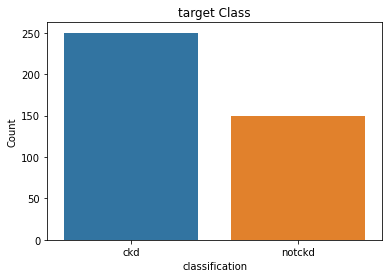

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


In [15]:
sns.countplot(x='classification',data=train)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(train[train['classification']=='ckd'])/len(train['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(train[train['classification']=='notckd'])/len(train['classification'])*100,2),"%")

<div><h2><b><center>Correlation</b></h2></div>

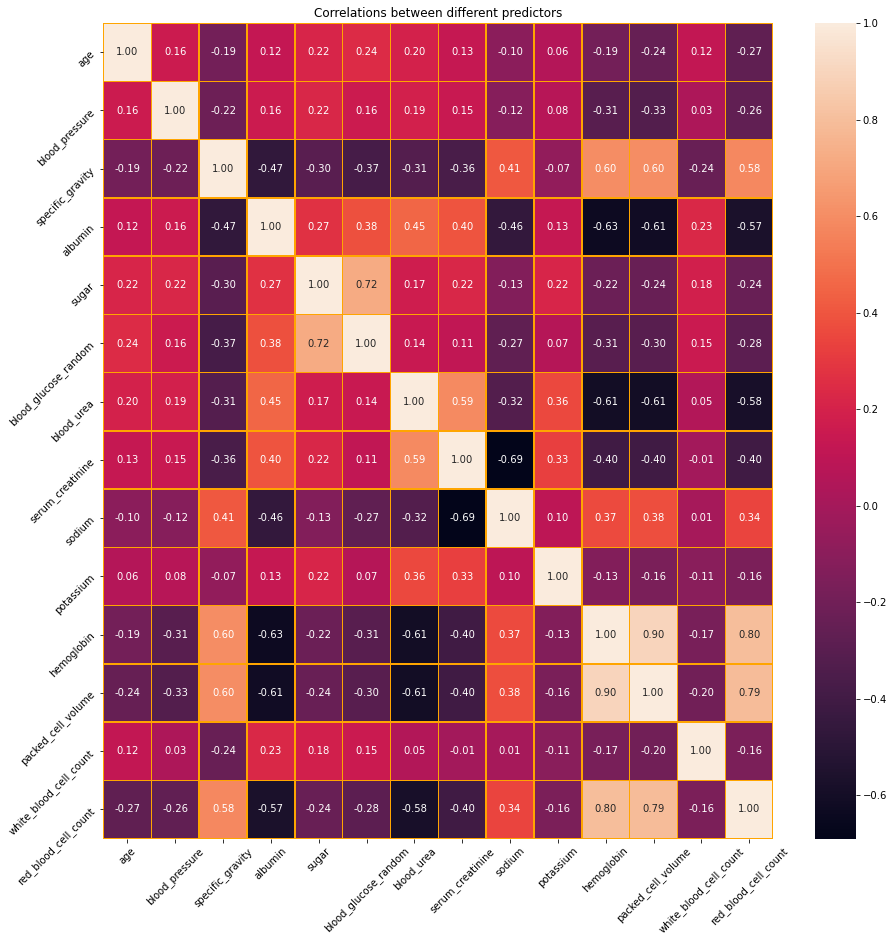

In [16]:
corr_df = train.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

## Positive Correlation

* **hemoglobin** -> red_blood_cell_count,packed_cell_volume, specific_gravity
* **red_blood_cell_count** -> packed_cell_volume,specific_gravity
* **specific_gravity** -> packed_cell_volume
* **blood_glucose_random** -> sugar
* **serum_creatinine** -> blood_urea

## Negative correlation

* **Albumin** -> hemoglobin, packed_cell_volume,specific_gravity,red_blood_cell_count
* **serum_creatinine** -> sodium
* **blood_urea** -> hemoglobin, packed_cell_volume,red_blood_cell_count

In [17]:
numerical_features=[feature for feature in train.columns if train[feature].dtypes=='float64']
print('total numerical column :',len(numerical_features))
print(numerical_features)

total numerical column : 14
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [18]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O']
print('total categorical column :',len(categorical_features))
print(categorical_features)

total categorical column : 11
['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


In [19]:
train[categorical_features].describe(include='all').T

,count,unique,top,freq
red_blood_cells,248,2,normal,201
pus_cell,335,2,normal,259
pus_cell_clumps,396,2,notpresent,354
bacteria,396,2,notpresent,374
hypertension,398,2,no,251
diabetes_mellitus,398,2,no,261
coronary_artery_disease,398,2,no,364
appetite,399,2,good,317
pedal_edema,399,2,no,323
anemia,399,2,no,339


### Observation
* **red_blood_cells** are having highest missing values i.e 107 values are missing
* **pus_cell** having 50 values missing 
* **pus_cell_clumps** and **bacteria** having 4 values missing
* **hypertension, diabetes_mellitus** and **coronary_artery_disease** having only 1 value missing 

In [20]:
train[numerical_features].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood_glucose_random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood_urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum_creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
potassium,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


<div><h2><b><center>Percentage of missing values</b></h2></div>

In [21]:
((train[numerical_features].isnull().sum()/train.shape[0])*100).sort_values(ascending=False)

red_blood_cell_count      32.75
white_blood_cell_count    26.50
potassium                 22.00
sodium                    21.75
packed_cell_volume        17.75
hemoglobin                13.00
sugar                     12.25
specific_gravity          11.75
albumin                   11.50
blood_glucose_random      11.00
blood_urea                 4.75
serum_creatinine           4.25
blood_pressure             3.00
age                        2.25
dtype: float64

In [22]:
def violin(col): 
    fig = px.violin(train, y=col, x="classification", color="classification", box=True, points="all", hover_data=train.columns)
    return fig.show()
def kde_plot(feature):
    grid = sns.FacetGrid(train, hue="classification", aspect = 2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

## RBC, PCV, Hemoglobin

* Red_blood_cell counts have the highest missing value i.e 34% values are missing.
* Packed_cell_volume has 18% and hemoglobin has 14% values missing.
* From the correlation graph, we have seen that red_blood_cell count has a high positive correlation with hemoglobin and packed_cell_volume.

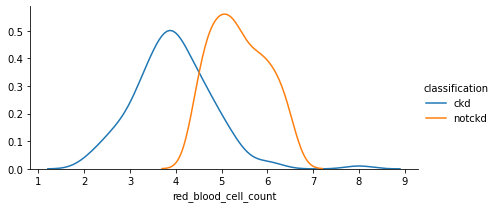

In [23]:
kde_plot('red_blood_cell_count')

In [24]:
train.groupby(['classification'])['red_blood_cell_count'].agg(['mean','median'])

,mean,median
classification,,
ckd,3.945238,3.9
notckd,5.379021,5.3


* Both distributions are very different, CKD distribution has a long tail which shows it has a portion of the distribution having many occurrences far from the "head" or central part of the distribution.
* CKD and not-CKD follow a normal distribution as the mean and median are almost equal.

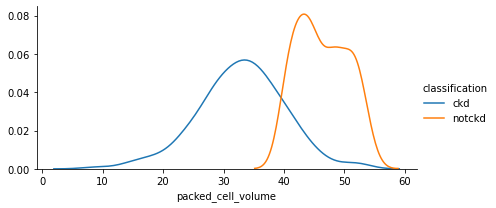

In [25]:
kde_plot('packed_cell_volume')

* Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

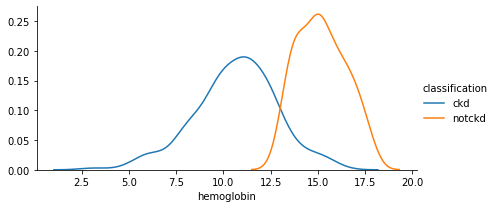

In [26]:
kde_plot('hemoglobin')

In [27]:
train.groupby(['classification'])['hemoglobin'].agg(['mean','median'])

,mean,median
classification,,
ckd,10.647549,10.9
notckd,15.188194,15.0


In [28]:
fig = px.scatter(train, x="red_blood_cell_count", y="hemoglobin", color="classification")
fig.show() 

* As red_blood_cell_count increases hemoglobin(high positive correlation(0.79))
* person having RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney disease(i.e ckd).
* person having RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney disease(i.e not-CKD).
* there are few cases where even a person having a normal range of RBC count and hemoglobin still he or she has chronic kidney disease because of other factors will check this later

In [29]:
fig = px.scatter(train, x="red_blood_cell_count", y="packed_cell_volume", color="classification")
fig.show()

In [30]:
fig = px.scatter(train, x="packed_cell_volume", y="red_blood_cell_count", color="classification")
fig.show()

In [31]:
fig = px.bar(train, x="red_blood_cells", y="red_blood_cell_count",color='classification', barmode='group',height=400)
fig.show()

In [32]:
train.groupby(['red_blood_cells','classification'])['red_blood_cell_count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red_blood_cells classification                                   
abnormal        ckd                25  3.832000     3.7  2.5  5.6
normal          ckd                40  3.782500     3.8  2.1  8.0
                notckd            134  5.368657     5.3  4.4  6.5

Observation
* As red_blood_cell_count increases packed_cell_volume also increases 
* person having RBC count range between 2 to <4.5 and packed_cell_volume 9 to <40 are **mostly** classified as chronic kidney disease patient.
* person having RBC count range between >4.5 to 6.2 and packed_cell volume range >40 to 54 are classified as normal i.e not chronic kidney disease
* there are few cases where even a person having a normal range of RBC count and packed_cell_volume still he or she has chronic kidney disease because of other factors, will check this later
* Also we have seen through plots that those having a normal range of hemoglobin i.e 13 to 17.8 are mostly non-ckd.
* All whos falling in abnormal red_blood_cells level are suffering from chronic kidney disease. for those who’s red_blood_cells are normal but having high and low red_blood_cell_counts are prone to have CKD

In [33]:
violin('red_blood_cell_count')

In [34]:
violin('packed_cell_volume')

In [35]:
violin('hemoglobin')

Observation:
* red_blood_cell_count, packed_cell_volume, and hemoglobin has few outlier and inlier.

In [36]:
def missing_value(feature): 
    a = train[(train[feature].isnull())]
    return a.groupby(['classification'])['classification'].agg(['count'])
    

In [37]:
print('missing values in RBC column:\n\n',missing_value('red_blood_cell_count'),'\n')
print('missing values in Packed cell volume column:\n\n',missing_value('packed_cell_volume'),'\n')
print('missing values in Hemoglobin column:\n\n',missing_value('hemoglobin'),'\n')

missing values in RBC column:

                 count
classification       
ckd               124
notckd              7 

missing values in Packed cell volume column:

                 count
classification       
ckd                67
notckd              4 

missing values in Hemoglobin column:

                 count
classification       
ckd                46
notckd              6 



## Albumin

Let's check albumin is having a negative correlation with hemoglobin(-0.64) and packed_cell_volume(-0.62)

In [38]:
fig = px.bar(train, x="albumin", y="packed_cell_volume",color='classification', barmode='group',height=400)
fig.show()

In [39]:
train.groupby(['albumin','classification'])['albumin'].count()

albumin  classification
0.0      ckd                54
         notckd            145
1.0      ckd                44
2.0      ckd                43
3.0      ckd                43
4.0      ckd                24
5.0      ckd                 1
Name: albumin, dtype: int64

* Level 0 above for albumin is symptoms of CKD. 
* packed_cell_volume is in pretty much in a normal range both the cases CKD and in non-CKD.

In [40]:
fig = px.bar(train, x="albumin", y="hemoglobin",color='classification', barmode='group',height=400)
fig.show()

* The majority, those people are suffering from chronic kidney disease who’s having less(<13) hemoglobin and >0 levels of albumin.

In [41]:
violin('albumin')

## Specific gravity

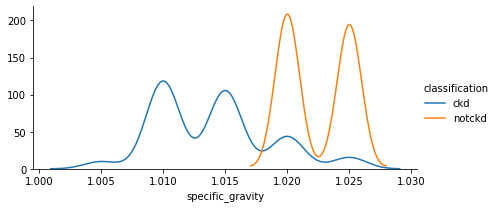

In [42]:
kde_plot('specific_gravity')

In [43]:
fig = px.bar(train, x="specific_gravity", y="packed_cell_volume",
             color='classification', barmode='group',
             height=400)
fig.show()

In [44]:
print("number of patient who's having packed cell volume<40 and specific gravity <1.02:\n\n",train[(train['packed_cell_volume']<40)&(train['specific_gravity']<1.02)].groupby(['classification'])['classification'].agg(['count']))
print("packed cell volume >=40 and specific gravity >=1.02:\n\n",train[(train['packed_cell_volume']>=40)&(train['specific_gravity']>=1.02)].groupby(['classification'])['classification'].agg(['count']))

number of patient who's having packed cell volume<40 and specific gravity <1.02:

                 count
classification       
ckd               109
packed cell volume >=40 and specific gravity >=1.02:

                 count
classification       
ckd                 4
notckd            141


* higher the specific_gravity lesser the chances of having CKD
* from the above stats we clearly say that person having packed_cell_volume <40 and specific gravity <1.02 are all CKD patients. 

In [45]:
fig = px.bar(train, x="specific_gravity", y="hemoglobin",
             color='classification', barmode='group',
             height=400)
fig.show()

In [46]:
print("number of patient who's having hemoglobin <12 and specific gravity <1.02:\n\n",train[(train['hemoglobin']<12)&(train['specific_gravity']<1.02)].groupby(['classification'])['classification'].agg(['count']))
print("hemoglobin >=12 and specific gravity >=1.02:\n\n",train[(train['packed_cell_volume']>=12)&(train['specific_gravity']>=1.02)].groupby(['classification'])['classification'].agg(['count']))

number of patient who's having hemoglobin <12 and specific gravity <1.02:

                 count
classification       
ckd               101
hemoglobin >=12 and specific gravity >=1.02:

                 count
classification       
ckd                26
notckd            141


* higher the specific_gravity lesser the chances of having CKD
* chances of having CKD is high if a person having a specific gravity level 1.005,1.01,1.015 and hemoglobin below normal range i.e <13.
* there are few patients(CKD) who having a normal range of hemoglobin but having less specific_gravity.

In [47]:
fig = px.bar(train, x="specific_gravity", y="red_blood_cell_count",
             color='classification', barmode='group',
             height=400)
fig.show()

In [48]:
print("number of patient who's having RBC <3.9 and specific gravity <1.02:\n\n",train[(train['red_blood_cell_count']<3.9)&(train['specific_gravity']<1.02)].groupby(['classification'])['classification'].agg(['count']))
print("RBC >=3.9 and specific gravity >=1.02:\n\n",train[(train['red_blood_cell_count']>=3.9)&(train['specific_gravity']>=1.02)].groupby(['classification'])['classification'].agg(['count']))

number of patient who's having RBC <3.9 and specific gravity <1.02:

                 count
classification       
ckd                42
RBC >=3.9 and specific gravity >=1.02:

                 count
classification       
ckd                 9
notckd            138


In [49]:
train[(train['packed_cell_volume']<40)&(train['specific_gravity']<1.02)&(train['hemoglobin']<12)&(train['red_blood_cell_count']<3.9)].groupby(['classification'])['classification'].agg(['count'])

,count
classification,
ckd,41


In [50]:
violin('specific_gravity')

## White blood cell count

White blood cells are vital components of the blood. Their role is to fight infection, and they are essential for health and well-being. The normal number of WBCs in the blood is 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × 109/L).

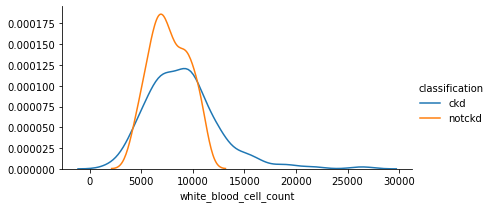

In [51]:
kde_plot('white_blood_cell_count')

* Pattern of CKD and not-CKD is different
* Distribution of chronic kidney disease is little skewed towards the left while the distribution of non-CKD is pretty normal.

In [52]:
train[(train['white_blood_cell_count']>=4300) &(train['white_blood_cell_count']<=11000)&(train['classification']=='ckd')]

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,64.0,90.0,1.015,3.0,2.0,NaN,abnormal,present,notpresent,463.0,...,40.0,9800.0,4.6,yes,yes,no,good,no,yes,ckd
245,48.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,103.0,...,19.0,7200.0,2.6,yes,no,yes,poor,no,no,ckd
246,48.0,110.0,1.015,3.0,0.0,abnormal,normal,present,notpresent,106.0,...,26.0,5000.0,2.5,yes,no,yes,good,no,yes,ckd
248,59.0,70.0,1.010,1.0,3.0,abnormal,abnormal,notpresent,notpresent,424.0,...,37.0,10200.0,4.1,yes,yes,yes,good,no,no,ckd


In [53]:
violin('white_blood_cell_count')

* From the above data, we can say that those having a normal range of white_blood_cell_count they are also having chronic diseases
* White_blood_cell does not have any correlation with any column

## potassium, blood urea, pus cell, pus cell clumps

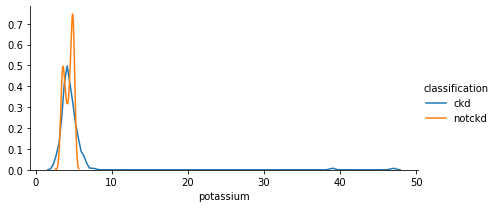

In [54]:
kde_plot('potassium')

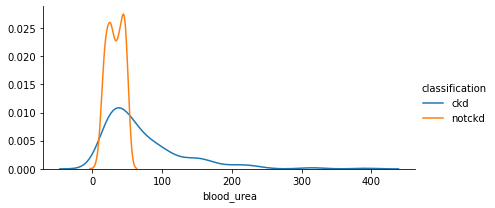

In [55]:
kde_plot('blood_urea')

* Above plots clearly describes the similar pattern of chronic kidney disease and non-chronic disease of potassium.
* Distribution is very different in the case of blood urea
* From the correlation plot, we can see that potassium having positive relation with  blood_urea(0.4) and serum_creatinine(0.36). Let's check if it helps to find any pattern or certain behavior

In [56]:
fig = px.scatter(train, x="potassium", y="blood_urea", color="classification")
fig.show()

* here we have potassium in range 2.7 to 6.5 and blood urea in range 10 to 391 including both CKD and, not-CKD.
* We have 2 extreme cases of CKD, they have a high range of potassium and blood urea
* people have blood urea in the range 10 to 50 are majorly classified as a not-CKD, blood urea more than 50 are classified as CKD patient 
* there are few cases where a person having potassium and blood urea within range still they are suffering from CKD.

In [57]:
fig = px.scatter(train, x="potassium", y="serum_creatinine", color="classification")
fig.show()

In [58]:
violin('potassium')

* Your body uses the potassium it needs. The extra potassium that your body does not need is removed from your blood by your kidneys. When you have kidney disease, your kidneys cannot remove extra potassium in the right way, and too much potassium can stay in your blood.
*  From the above two scatter plots we can see that those people who are suffering from chronic kidney disease contain higher potassium since their kidney is unable to remove extra potassium, but we have also observed that people are still suffering through chronic disease even if they have normal range of potassium. 
* Even though serum_creatinine and blood_urea having slight positive relation not giving many insights about potassium.
* We have 2 abnormal values as an outlier(39, 47)

In [59]:
violin('blood_urea')

In [60]:
fig = px.bar(train, x="pus_cell", y="blood_urea",color='classification', barmode='group',height=400)
fig.show()

In [61]:
fig = px.bar(train, x="pus_cell_clumps", y="blood_urea",color='classification', barmode='group',height=400)
fig.show()

* From the above 2 plot we can say that blood urea and pus cell has no correlation, distribution of blood urea is pretty even in normal and abnormal case.
* 90% of the time person is suffering from CKD irrespective of blood_urea range

## Sodium, serum creatinine, Blood pressure, hypertension

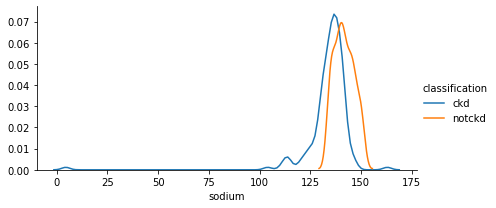

In [62]:
kde_plot('sodium')

* A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L)
* It helps maintain normal blood pressure, supports the work of your nerves and muscles, and regulates your body's fluid balance, lets check the correlation between blood pressure and sodium.
* sodium has a negative correlation with serum creatinine. 

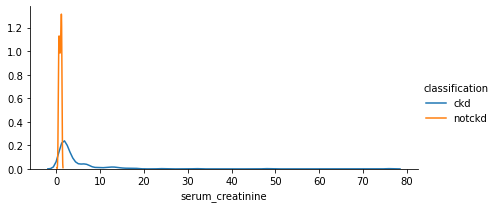

In [63]:
kde_plot('serum_creatinine')

Creatinine is a waste product that comes from normal wear and tears on the muscles of the body. Creatinine levels in the blood can vary depending on age, race, and body size. A creatinine level of greater than 1.2 for women and greater than 1.4 for men may be an early sign that the kidneys are not working properly. As kidney disease progresses, the level of creatinine in the blood rises.

In [64]:
fig = px.scatter(train, x="sodium", y="blood_pressure", color="classification")
fig.show()

* People who had blood pressure <60 to  >80 are prone to have a chronic disease.

In [65]:
fig = px.scatter(train, x="sodium", y="serum_creatinine", color="classification")
fig.show()

* people having serum creatinine <0.5 to >1.2 are prone to have a chronic disease.
* Serum creatinine has a direct impact on chronic disease

In [66]:
train[train['classification']=='notckd']['serum_creatinine'].agg(['min','max'])

min    0.4
max    1.2
Name: serum_creatinine, dtype: float64

* The normal range for creatinine in the blood maybe 0.84 to 1.21 milligrams per deciliter, 
* From the above plot we can say that all, a not-CKD person has a normal range of serum creatinine
* Even though a person has a normal range of sodium but s/he is suffering from CKD

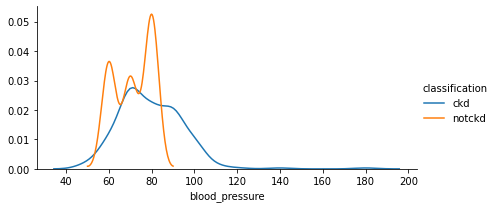

In [67]:
kde_plot('blood_pressure')

In [68]:
train.groupby(['classification','hypertension'])['blood_pressure'].agg(['min','max','count','mean','median'])

min    max  count       mean  median
classification hypertension                                       
ckd            no            50.0  120.0     95  77.052632    80.0
               yes           50.0  180.0    145  81.310345    80.0
notckd         no            60.0   80.0    146  71.438356    70.0

In [69]:
fig = px.bar(train, x="hypertension", y="blood_pressure",color='classification', barmode='group',height=400)
fig.show()

* most of the people suffering from hypertension having chronic kidney disease. There is no correlation found with blood pressure

In [70]:
violin('blood_pressure')

## blood glucose random, sugar, diabetes_mellitus

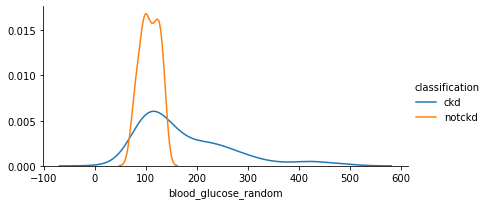

In [71]:
kde_plot('blood_glucose_random')

In [72]:
fig = px.bar(train, x="sugar", y="blood_glucose_random",
             color='classification', barmode='group',
             height=400)
fig.show()

* Higher the glucose and sugar level (above 1) more chances of having chronic kidney disease.

In [73]:
fig = px.bar(train, x="diabetes_mellitus", y="blood_glucose_random",
             color='classification', barmode='group',
             height=400)
fig.show()

In [74]:
train.groupby(['classification'])['blood_glucose_random'].agg(['min','max','median','mean'])

,min,max,median,mean
classification,,,,
ckd,22.0,490.0,143.5,175.419811
notckd,70.0,140.0,107.5,107.722222


* CKD patients have a high range of glucose than non-CKD
* From the KDE plot, we can clearly see a different distribution of CKD and non-ckd. non-ckd following Leptokurtic whereas CKD following Platykurtic distribution.
* CKD distribution is right-skewed.
* mostly high blood sugar level causes diabetes mellitus 
* people not suffering from diabetes mellitus are having blood glucose range between 70 to 140 
* from the above bar plot we can say that person suffering from diabetes mellitus also suffering from chronic kidney disease.

In [75]:
violin('blood_glucose_random')

## Age

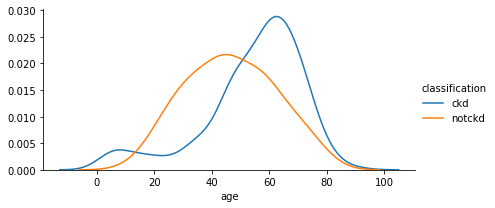

In [76]:
kde_plot('age')

In [77]:
train.groupby(['classification'])['age'].agg(['min','max','count','mean','median'])

,min,max,count,mean,median
classification,,,,,
ckd,2.0,90.0,242,54.541322,59.0
notckd,12.0,80.0,149,46.516779,46.0


In [78]:
violin('age')

* Age is between 2 to 90, that is even 2 years kid and 90 year person suffering from chronic kidney diseases, so throght visualisation we can say that there is no such specific age gruop is suffering from ckd.
* CKD distribution is slightly left skewed with high concentration of data between 40-76. There are few outliers on the lower spectrum of age
* there is no correlation between age and other variables

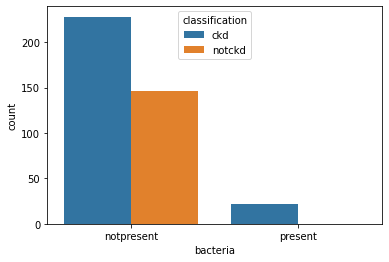

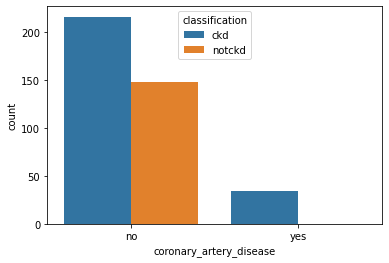

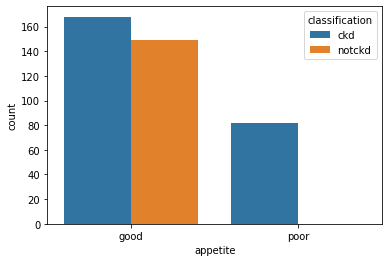

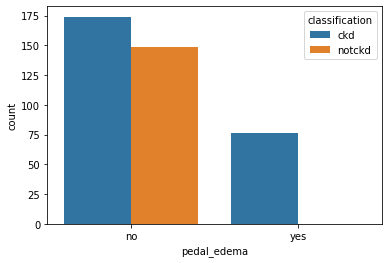

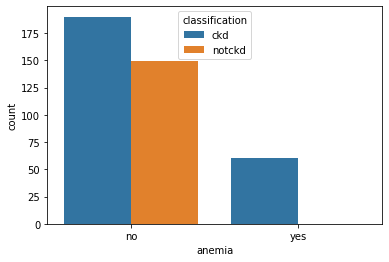

In [79]:
col = ['bacteria','coronary_artery_disease', 'appetite', 'pedal_edema','anemia']
for i in col:
    sns.countplot(i, hue = 'classification', data = train)
    plt.show()


### conclusion

* RBC count is highly correlated with hemoglobin and packed_volume_area
* red blood cell level is abnormal and RBC count high or low than a normal range than person likely to have CKD
* white_blood_cell, sodium, and potassium, blood_press no such relation with other variables
* if a person is having less specific gravity(levels 1.005,1.01,1.015) with lesser hemoglobin(<13) and less packed cell volume(<40)  higher chances of having CKD
* Albumin and Hemoglobin have a negative correlation(correlation matric) mostly albumin level above 0 and hemoglobin higher than normal range is an indication CKD 
* If blood urea level is higher than 150 than there are higher chances of having a chronic kidney disease
* Higher the serum creatinine level i.e >1.2, people likely to have chronic kidney diseases. 
* People who had blood pressure <60 to  >80 are prone to have a chronic disease.
* high range of blood glucose random, sugar level above 1and also suffering from diabetes_mellitus are majorly classified as chronic kidney disease.
* Age has no such correlation with other variables
* red_blood_cell - red_blood_cell_count
* From the above analysis, we can see that presence of even one - abnormal red cell count, bacteria, hypertension, pus cells, diabetes, coronary disease, lack of appetite, amenic increases chances of occurence of ckd to substantial level.
